## Challenge - What do you see?

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Importing data from the General Social Survey 2012.  More info [here](http://www.icpsr.umich.edu/icpsrweb/ICPSR/studies/35478).

In [56]:
#General Social Survey, 2012

df = pd.read_csv('/Users/joannelin410/Code/Thinkful Prep Course/ICPSR_35478/DS0001/35478-0001-Data.csv')

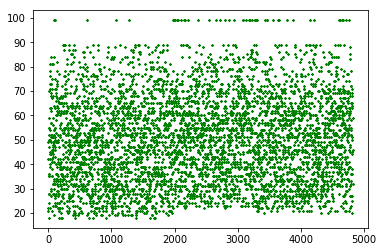

In [57]:
#Looking at age distribution of respondents

age_plt = plt.scatter(
    x=df.index, 
    y=df['AGE'],
    color='green',
    marker='x', s=3)
plt.show()

Age of respondents range from 15 - 100.  Although, there is a suspicious gap between ages 90 - 100.  I suspect the respondents marked as 100 years old are input errors.  It looks pretty evenly distributed otherwise, with more respondents in the 30-60 age range.

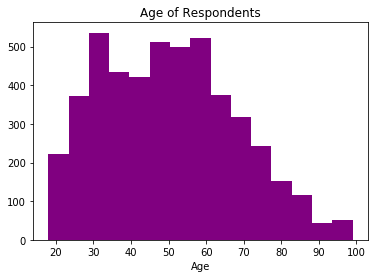

In [58]:
plt.hist(df['AGE'], bins=15, color='purple')
plt.title('Age of Respondents')
plt.xlabel('Age')
plt.show()

Looking at the ages of respondents with a histogram.  There is a spike in repondents in their early 30s, and then between 45-60 years of age.  

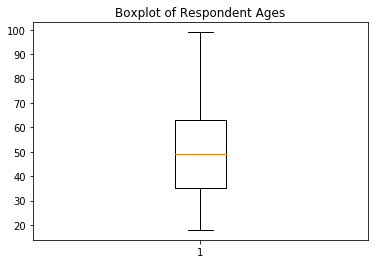

In [59]:
plt.boxplot(df['AGE'])
plt.title('Boxplot of Respondent Ages')
plt.show()

There doesn't seem to be any fliers or outliers in the age data.

(array([ 446.,  639.,  407.,  295.,  290.,  215.,  166.,  103.,   72.,   55.]),
 array([  0. ,   7.1,  14.2,  21.3,  28.4,  35.5,  42.6,  49.7,  56.8,
         63.9,  71. ]),
 <a list of 10 Patch objects>)

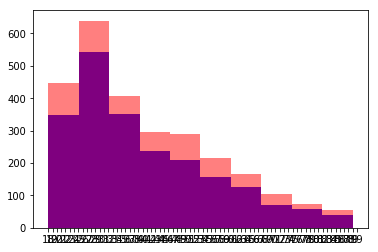

In [74]:
#Looking at distributions of age comparing sexes.
x = df.loc[df['SEX'] == 1, ['AGE']]
y = df.loc[df['SEX'] == 2, ['AGE']]

plt.hist(x, color='blue', bins= 10, alpha= 1) 
plt.hist(y, color='red', bins= 10, alpha=.5)

There are more female than male respondents in all age groups.

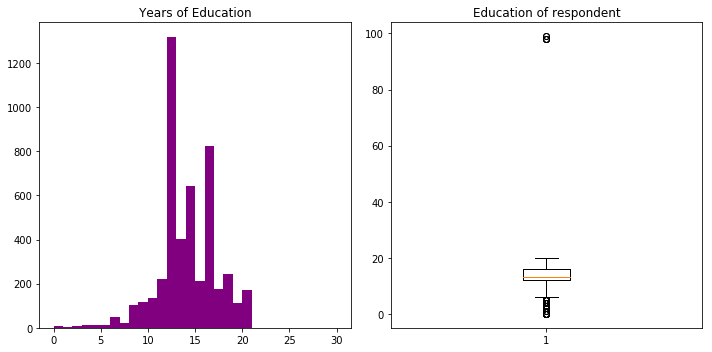

In [83]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.hist(df['EDUC'], bins = 30, color = 'purple', range = (0,30))
plt.title('Years of Education')

plt.subplot(1,2,2)
plt.boxplot(df['EDUC'])
plt.title('Education of respondent')

plt.tight_layout()
plt.show()

Looking at the years of education for the respondents.  The highest percentage of respondents have a high school degree.  The boxplot shows that there are outliers at 100 and less than 5 years of education.  These are possibly input errors, or represent no response from the respondent for this question.

I will be examining the two survey questions below.

DISCAFF: Categorical (Single) 
What do you think the chances are these days that a white person won't get a job or promotion while an equally or less qualified black person gets one instead? Is this very likely, somewhat likely, or not very likely to happen these days?

    1 - Very likely
    2 - Somewhat likely
    3 - Not very likely
    8 - Don't know
    9 - No answer
    0 - Inapplicable

DISCAFFM: Categorical (Single)
What do you think the chances are these days that a man won't get a job or promotion while an equally or less qualified woman gets one instead. Is this very likely, somewhat likely, somewhat unlikely, or very unlikely these days?

    1 - Very likely
    2 - Somewhat likely
    3 - Somewhat unlikely
    4 - Very unlikely
    8 - Don't know
    9 - No answer

DISCAFFW: Categorical (Single)
What do you think the chances are these days that a woman won't get a job or promotion while an equally or less qualified man gets one instead. Is this very likely, somewhat likely, somewhat unlikely, or very unlikely these days?

    1 - Very likely
    2 - Somewhat likely
    3 - Somewhat unlikely
    4 - Very unlikely
    8 - Don't know
    9 - No answer
    
And looking at the following variables

    • SEX - Sex of respondent
    • EDUC - Years of education
    • DEGREE - Highest educational degree
    • WRKSTAT - Labor force status
    • RES16 - Type of place lived in when 16 years old
    • RACE - Race of respondent
    • REGION - Region of interview

### KEY
WRKSTAT

    • 1 - Full Time
    • 2 - Part Time
    • 3 - Temporary, not working
    • 4 - Unemployed
    • 5 - Retired
    • 6 - School
    • 7 - Keeping house
    • 8 - Other
    • 9 - No answer

DEGREE
    
    • 0 - Less than Highschool
    • 1 - Highschool graduate
    • 2 - Junior college
    • 3 - Bachelors
    • 4 - Graduate
    
Sex

    • 1 - Male
    • 2 - Female

RACE

    • 1 - White
    • 2 - Black
    • 3 - Other
    
RES16

    • 1 - Country, nonfarm
    • 2 - Farm
    • 3 - Town < 50,000
    • 4 - 50,000 - 250,000
    • 5 - Big City suburb
    • 6 - City > 250,000
    • 8 - I don't know
    • 9 - No answer

REGION

    • 1 - New England
    • 2 - Mid Atlantic
    • 3 - East North Central
    • 4 - West North Central
    • 5 - South Atlantic
    • 6 - East South Central
    • 7 - West South CEntral
    • 8 - Mountain
    • 9 - Pacific
    

In [61]:
# Selecting columns
df2 = pd.DataFrame(df[['ID','SEX','EDUC','DEGREE','WRKSTAT','AGE','RACE','REGION','RES16','DISCAFF','DISCAFFM','DISCAFFW']])

df2.head(10)

,ID,SEX,EDUC,DEGREE,WRKSTAT,AGE,RACE,RINCOME,REGION,RES16,DISCAFF,DISCAFFM,DISCAFFW
0,1,1,16,3,2,22,1,0,1,3,3,0,3
1,2,1,12,1,2,21,1,0,1,3,1,0,0
2,3,1,12,1,1,42,3,12,1,6,3,0,0
3,4,2,13,1,8,49,1,0,1,5,0,0,3
4,5,2,16,3,5,70,2,0,2,3,0,0,1
5,6,2,19,3,8,50,1,0,2,1,2,2,0
6,7,2,15,2,7,35,1,0,2,3,0,3,0
7,8,2,11,0,7,24,3,0,2,4,2,0,0
8,9,2,9,0,7,28,2,0,2,8,3,2,0
9,10,2,17,3,1,28,1,12,2,3,3,0,0


In [62]:
#Looking at just those who responded Very Likely to DISCAFF
df3 = df2[df2['DISCAFF'] == 1]

#Looking at the work status of those who responded "Very Likely"
df3.groupby('WRKSTAT').count() / df3.count() * 100


,AGE,DEGREE,DISCAFF,DISCAFFM,DISCAFFW,EDUC,ID,RACE,REGION,RES16,RINCOME,SEX,WRKSTAT
WRKSTAT,,,,,,,,,,,,,
1,40.534521,40.534521,40.534521,40.534521,40.534521,40.534521,40.534521,40.534521,40.534521,40.534521,40.534521,40.534521,NaN
2,9.799555,9.799555,9.799555,9.799555,9.799555,9.799555,9.799555,9.799555,9.799555,9.799555,9.799555,9.799555,NaN
3,2.672606,2.672606,2.672606,2.672606,2.672606,2.672606,2.672606,2.672606,2.672606,2.672606,2.672606,2.672606,NaN
4,6.681514,6.681514,6.681514,6.681514,6.681514,6.681514,6.681514,6.681514,6.681514,6.681514,6.681514,6.681514,NaN
5,23.385301,23.385301,23.385301,23.385301,23.385301,23.385301,23.385301,23.385301,23.385301,23.385301,23.385301,23.385301,NaN
6,1.559020,1.559020,1.559020,1.559020,1.559020,1.559020,1.559020,1.559020,1.559020,1.559020,1.559020,1.559020,NaN
7,12.249443,12.249443,12.249443,12.249443,12.249443,12.249443,12.249443,12.249443,12.249443,12.249443,12.249443,12.249443,NaN
8,3.118040,3.118040,3.118040,3.118040,3.118040,3.118040,3.118040,3.118040,3.118040,3.118040,3.118040,3.118040,NaN


Of the respondents who believe that it is very likely a white person won't get a job or promotion while an equally or less qualified black person gets one instead are working full time,

    40.5% are working full-time
    23.3% are retired.
    12.2% are keeping house.
    9.8% are working part-time.

In [63]:
#Looking at just those who responded Not Very Likely to DISCAFF
df4 = df2[df2['DISCAFF'] == 3]

df4.groupby('WRKSTAT').count() / df4.count() * 100

,AGE,DEGREE,DISCAFF,DISCAFFM,DISCAFFW,EDUC,ID,RACE,REGION,RES16,RINCOME,SEX,WRKSTAT
WRKSTAT,,,,,,,,,,,,,
1,53.017945,53.017945,53.017945,53.017945,53.017945,53.017945,53.017945,53.017945,53.017945,53.017945,53.017945,53.017945,NaN
2,12.561175,12.561175,12.561175,12.561175,12.561175,12.561175,12.561175,12.561175,12.561175,12.561175,12.561175,12.561175,NaN
3,1.223491,1.223491,1.223491,1.223491,1.223491,1.223491,1.223491,1.223491,1.223491,1.223491,1.223491,1.223491,NaN
4,4.241436,4.241436,4.241436,4.241436,4.241436,4.241436,4.241436,4.241436,4.241436,4.241436,4.241436,4.241436,NaN
5,14.437194,14.437194,14.437194,14.437194,14.437194,14.437194,14.437194,14.437194,14.437194,14.437194,14.437194,14.437194,NaN
6,2.936378,2.936378,2.936378,2.936378,2.936378,2.936378,2.936378,2.936378,2.936378,2.936378,2.936378,2.936378,NaN
7,8.890701,8.890701,8.890701,8.890701,8.890701,8.890701,8.890701,8.890701,8.890701,8.890701,8.890701,8.890701,NaN
8,2.691680,2.691680,2.691680,2.691680,2.691680,2.691680,2.691680,2.691680,2.691680,2.691680,2.691680,2.691680,NaN


Of the respondents who believe that it is not very likely a white person won't get a job or promotion while an equally or less qualified black person gets one instead are working full time,
    
    53.0% are working full-time
    14.4% are retired.
    12.6% are working part-time
    8.9% are keeping house

In [64]:
#Looking at the educational degree of those who responded "Very Likely"
df3.groupby('DEGREE').count() / df3.count() * 100

,AGE,DEGREE,DISCAFF,DISCAFFM,DISCAFFW,EDUC,ID,RACE,REGION,RES16,RINCOME,SEX,WRKSTAT
DEGREE,,,,,,,,,,,,,
0,18.262806,NaN,18.262806,18.262806,18.262806,18.262806,18.262806,18.262806,18.262806,18.262806,18.262806,18.262806,18.262806
1,56.570156,NaN,56.570156,56.570156,56.570156,56.570156,56.570156,56.570156,56.570156,56.570156,56.570156,56.570156,56.570156
2,8.908686,NaN,8.908686,8.908686,8.908686,8.908686,8.908686,8.908686,8.908686,8.908686,8.908686,8.908686,8.908686
3,11.581292,NaN,11.581292,11.581292,11.581292,11.581292,11.581292,11.581292,11.581292,11.581292,11.581292,11.581292,11.581292
4,4.677060,NaN,4.677060,4.677060,4.677060,4.677060,4.677060,4.677060,4.677060,4.677060,4.677060,4.677060,4.677060


In [65]:
#Looking at the educational degree of those who responded "Not Very Likely"
df4.groupby('DEGREE').count() / df4.count() * 100

,AGE,DEGREE,DISCAFF,DISCAFFM,DISCAFFW,EDUC,ID,RACE,REGION,RES16,RINCOME,SEX,WRKSTAT
DEGREE,,,,,,,,,,,,,
0,11.256117,NaN,11.256117,11.256117,11.256117,11.256117,11.256117,11.256117,11.256117,11.256117,11.256117,11.256117,11.256117
1,43.637847,NaN,43.637847,43.637847,43.637847,43.637847,43.637847,43.637847,43.637847,43.637847,43.637847,43.637847,43.637847
2,7.340946,NaN,7.340946,7.340946,7.340946,7.340946,7.340946,7.340946,7.340946,7.340946,7.340946,7.340946,7.340946
3,23.898858,NaN,23.898858,23.898858,23.898858,23.898858,23.898858,23.898858,23.898858,23.898858,23.898858,23.898858,23.898858
4,13.866232,NaN,13.866232,13.866232,13.866232,13.866232,13.866232,13.866232,13.866232,13.866232,13.866232,13.866232,13.866232


In [66]:
#Looking at where the respondent lived at age 16 who responded "Very Likely"
df3.groupby('RES16').count() / df3.count() * 100

,AGE,DEGREE,DISCAFF,DISCAFFM,DISCAFFW,EDUC,ID,RACE,REGION,RES16,RINCOME,SEX,WRKSTAT
RES16,,,,,,,,,,,,,
1,13.585746,13.585746,13.585746,13.585746,13.585746,13.585746,13.585746,13.585746,13.585746,NaN,13.585746,13.585746,13.585746
2,11.135857,11.135857,11.135857,11.135857,11.135857,11.135857,11.135857,11.135857,11.135857,NaN,11.135857,11.135857,11.135857
3,34.298441,34.298441,34.298441,34.298441,34.298441,34.298441,34.298441,34.298441,34.298441,NaN,34.298441,34.298441,34.298441
4,13.585746,13.585746,13.585746,13.585746,13.585746,13.585746,13.585746,13.585746,13.585746,NaN,13.585746,13.585746,13.585746
5,12.249443,12.249443,12.249443,12.249443,12.249443,12.249443,12.249443,12.249443,12.249443,NaN,12.249443,12.249443,12.249443
6,15.144766,15.144766,15.144766,15.144766,15.144766,15.144766,15.144766,15.144766,15.144766,NaN,15.144766,15.144766,15.144766


In [67]:
#Looking at where the respondent lived at age 16 who responded "Not Very Likely"
df4.groupby('RES16').count() / df4.count() * 100

,AGE,DEGREE,DISCAFF,DISCAFFM,DISCAFFW,EDUC,ID,RACE,REGION,RES16,RINCOME,SEX,WRKSTAT
RES16,,,,,,,,,,,,,
1,9.135400,9.135400,9.135400,9.135400,9.135400,9.135400,9.135400,9.135400,9.135400,NaN,9.135400,9.135400,9.135400
2,9.624796,9.624796,9.624796,9.624796,9.624796,9.624796,9.624796,9.624796,9.624796,NaN,9.624796,9.624796,9.624796
3,27.650897,27.650897,27.650897,27.650897,27.650897,27.650897,27.650897,27.650897,27.650897,NaN,27.650897,27.650897,27.650897
4,21.696574,21.696574,21.696574,21.696574,21.696574,21.696574,21.696574,21.696574,21.696574,NaN,21.696574,21.696574,21.696574
5,14.763458,14.763458,14.763458,14.763458,14.763458,14.763458,14.763458,14.763458,14.763458,NaN,14.763458,14.763458,14.763458
6,17.047308,17.047308,17.047308,17.047308,17.047308,17.047308,17.047308,17.047308,17.047308,NaN,17.047308,17.047308,17.047308
8,0.081566,0.081566,0.081566,0.081566,0.081566,0.081566,0.081566,0.081566,0.081566,NaN,0.081566,0.081566,0.081566


In [68]:
#Looking at the regions of those who responded "Very Likely"
df3.groupby('REGION').count() / df3.count() * 100

,AGE,DEGREE,DISCAFF,DISCAFFM,DISCAFFW,EDUC,ID,RACE,REGION,RES16,RINCOME,SEX,WRKSTAT
REGION,,,,,,,,,,,,,
1,3.563474,3.563474,3.563474,3.563474,3.563474,3.563474,3.563474,3.563474,NaN,3.563474,3.563474,3.563474,3.563474
2,11.135857,11.135857,11.135857,11.135857,11.135857,11.135857,11.135857,11.135857,NaN,11.135857,11.135857,11.135857,11.135857
3,20.712695,20.712695,20.712695,20.712695,20.712695,20.712695,20.712695,20.712695,NaN,20.712695,20.712695,20.712695,20.712695
4,4.454343,4.454343,4.454343,4.454343,4.454343,4.454343,4.454343,4.454343,NaN,4.454343,4.454343,4.454343,4.454343
5,24.944321,24.944321,24.944321,24.944321,24.944321,24.944321,24.944321,24.944321,NaN,24.944321,24.944321,24.944321,24.944321
6,7.795100,7.795100,7.795100,7.795100,7.795100,7.795100,7.795100,7.795100,NaN,7.795100,7.795100,7.795100,7.795100
7,12.472160,12.472160,12.472160,12.472160,12.472160,12.472160,12.472160,12.472160,NaN,12.472160,12.472160,12.472160,12.472160
8,4.454343,4.454343,4.454343,4.454343,4.454343,4.454343,4.454343,4.454343,NaN,4.454343,4.454343,4.454343,4.454343
9,10.467706,10.467706,10.467706,10.467706,10.467706,10.467706,10.467706,10.467706,NaN,10.467706,10.467706,10.467706,10.467706


In [69]:
#Looking at the region of those who responded "Not Very Likely"
df4.groupby('REGION').count() / df4.count() * 100

,AGE,DEGREE,DISCAFF,DISCAFFM,DISCAFFW,EDUC,ID,RACE,REGION,RES16,RINCOME,SEX,WRKSTAT
REGION,,,,,,,,,,,,,
1,4.975530,4.975530,4.975530,4.975530,4.975530,4.975530,4.975530,4.975530,NaN,4.975530,4.975530,4.975530,4.975530
2,11.990212,11.990212,11.990212,11.990212,11.990212,11.990212,11.990212,11.990212,NaN,11.990212,11.990212,11.990212,11.990212
3,14.600326,14.600326,14.600326,14.600326,14.600326,14.600326,14.600326,14.600326,NaN,14.600326,14.600326,14.600326,14.600326
4,6.280587,6.280587,6.280587,6.280587,6.280587,6.280587,6.280587,6.280587,NaN,6.280587,6.280587,6.280587,6.280587
5,21.207178,21.207178,21.207178,21.207178,21.207178,21.207178,21.207178,21.207178,NaN,21.207178,21.207178,21.207178,21.207178
6,5.301794,5.301794,5.301794,5.301794,5.301794,5.301794,5.301794,5.301794,NaN,5.301794,5.301794,5.301794,5.301794
7,10.603589,10.603589,10.603589,10.603589,10.603589,10.603589,10.603589,10.603589,NaN,10.603589,10.603589,10.603589,10.603589
8,7.667210,7.667210,7.667210,7.667210,7.667210,7.667210,7.667210,7.667210,NaN,7.667210,7.667210,7.667210,7.667210
9,17.373573,17.373573,17.373573,17.373573,17.373573,17.373573,17.373573,17.373573,NaN,17.373573,17.373573,17.373573,17.373573


In [71]:
#Looking at the RACE of those who responded "Very Likely"
df3.groupby('RACE').count() / df3.count() * 100

,AGE,DEGREE,DISCAFF,DISCAFFM,DISCAFFW,EDUC,ID,RACE,REGION,RES16,RINCOME,SEX,WRKSTAT
RACE,,,,,,,,,,,,,
1,77.060134,77.060134,77.060134,77.060134,77.060134,77.060134,77.060134,NaN,77.060134,77.060134,77.060134,77.060134,77.060134
2,14.253898,14.253898,14.253898,14.253898,14.253898,14.253898,14.253898,NaN,14.253898,14.253898,14.253898,14.253898,14.253898
3,8.685969,8.685969,8.685969,8.685969,8.685969,8.685969,8.685969,NaN,8.685969,8.685969,8.685969,8.685969,8.685969


In [72]:
#Looking at the RACE of those who responded "Not Very Likely"
df4.groupby('RACE').count() / df4.count() * 100

,AGE,DEGREE,DISCAFF,DISCAFFM,DISCAFFW,EDUC,ID,RACE,REGION,RES16,RINCOME,SEX,WRKSTAT
RACE,,,,,,,,,,,,,
1,71.859706,71.859706,71.859706,71.859706,71.859706,71.859706,71.859706,NaN,71.859706,71.859706,71.859706,71.859706,71.859706
2,18.270799,18.270799,18.270799,18.270799,18.270799,18.270799,18.270799,NaN,18.270799,18.270799,18.270799,18.270799,18.270799
3,9.869494,9.869494,9.869494,9.869494,9.869494,9.869494,9.869494,NaN,9.869494,9.869494,9.869494,9.869494,9.869494
